In [3]:
with open('./data/input_19.txt') as fh:
    file_input = fh.read().strip()
mem = [int(d) for d in file_input.split(',')]

In [35]:
from intcode import intcode
import numpy as np

In [114]:
_inp = []
_out = []
ic = intcode(mem, add_mem=10000, take_input=lambda: _inp.pop(0), give_output=_out.append)

In [81]:
# part 1

In [57]:
scan = np.zeros((50, 50))
for x in range(50):
    for y in range(50):
        ic.reset()
        _inp = [x, y]
        ic.run()
        scan[y, x] = _out.pop()
        
print(scan.sum())

231.0


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [65]:
scan.sum(axis=0)

array([1., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 2., 2., 3., 3.,
       3., 3., 4., 4., 4., 4., 5., 5., 4., 5., 5., 5., 5., 6., 6., 6., 6.,
       7., 7., 7., 6., 7., 7., 7., 8., 8., 8., 8., 9., 9., 9., 9., 9.])

In [70]:
n = 100
scan = np.zeros((n, n))
for x in range(n):
    for y in range(n):
        if abs(x - y) > 40 or y > x:
            continue
        ic.reset()
        _inp = [x, y]
        ic.run()
        scan[y, x] = _out.pop()
        
print(scan.sum())

927.0


In [77]:
np.arange(100)[scan[:, 99] == 1]

array([73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90])

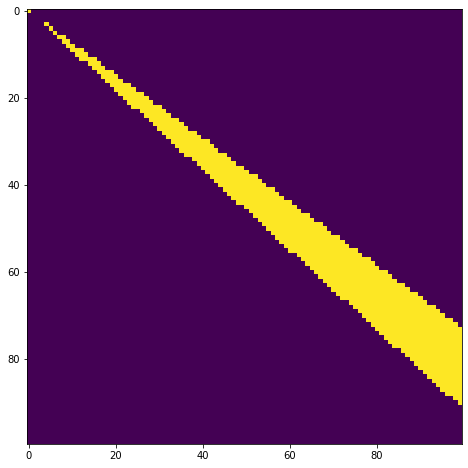

In [71]:
plt.imshow(scan)

In [98]:
# find m1
m1 = 0.73

for i in range(3, 9):
    x = 10**i
    y = m1 * x
    init = None
    while True:
        ic.reset()
        _inp = [x, y]
        ic.run()
        res = _out.pop()
#         print(y, res)
        if init is None:
            init = res
        if res == 1:
            y -= 1
        else:
            y += 1
        if res != init:
            m1 = y / x
            break

m2 = 0.9
for i in range(3, 9):
    x = 10**i
    y = m2 * x
    init = None
    while True:
        ic.reset()
        _inp = [x, y]
        ic.run()
        res = _out.pop()
#         print(y, res)
        if init is None:
            init = res
        if res == 1:
            y += 1
        else:
            y -= 1
        if res != init:
            m2 = y / x
            break


print(m1, m2)

0.73029745 0.91673813


In [ ]:
# part 2

In [ ]:
x1 * m1 = y1
x2 * m2 = y2
x1 = x2 + 100
y2 = y1 + 100

In [139]:
for i in range(int(1e3)):
    x2 = i
    y2 = x2 * m2
    x1 = x2 + 99
    y1 = x1 * m1
    if (y2 - y1) >= 99:
        print(x2, y2, x1, y1)
        break

919 842.48234147 1018 743.4428041


In [115]:
def test_pos(x, y):
    ic.reset()
    _inp.append(x)
    _inp.append(y)
    ic.run()
    return _out.pop()

In [155]:
test_pos(921, 844)

1

In [157]:
test_pos(1020, 745)

1

In [158]:
921 * 10000 +  745

9210745

In [130]:
850 - 751

99

In [105]:
x = int(x2)
y = int(y2)
while True:
    _inp = [x, y]
    

929